In [1]:
%load_ext tensorboard
%tensorboard --logdir=/home/adong/hdrnet-pytorch/jho_logs/lightning_logs/version_1912216/

# Import statements

In [1]:
import sys
sys.path.append('../src')
from model_building import HDRPointwiseNN
from dataset import HDRDataset
import os
from PIL import Image
import math
import torch
from torch.utils.data import Dataset, DataLoader,random_split
from torchvision import transforms

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from utils import plot_one_image,plot_batch_of_images

# Load some validation pictures

In [2]:
#image_path = '/home/adong/Downloads/carlos.png'
image_path = '/home/adong/hdrnet-pytorch/data/tiny_original/DSC_4329.jpg'

#model_path = r'E:\Projects\hdrnet-pytorch\jho_logs\lightning_logs\version_1701084\checkpoints\epoch=25-step=1044.ckpt' 
model_path = '/home/adong/hdrnet-pytorch/checkpoints/justinho_1.ckpt'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


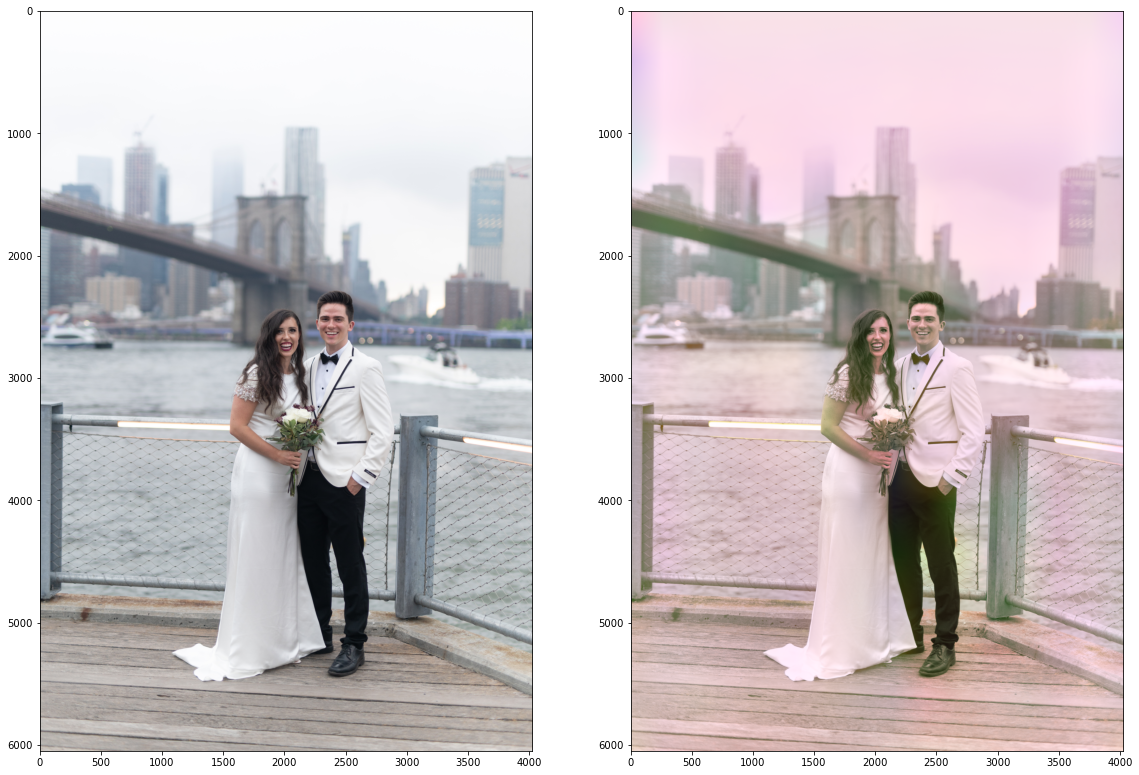

In [3]:
plot_one_image(image_path,model_path)

In [ ]:
orig_photos_path = 'E:\Projects\StyleTransfer\justinho_dataset_processed\small_original_reduced_size'
target_photos_path = 'E:\Projects\StyleTransfer\justinho_dataset_processed\small_edited_reduced_size'

dataset = HDRDataset(orig_photos_path,target_photos_path)
dataset_length = len(dataset)
train_length = math.ceil(.8 *dataset_length)
val_length = dataset_length-train_length
train_set, val_set = random_split(dataset, [train_length, val_length], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_set, batch_size = 4)
val_loader =  DataLoader(val_set, batch_size = 4)

In [ ]:
plot_batch_of_images(val_loader,model_path)